In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import random
import matplotlib.pyplot as plt

In [2]:
#it is better to import this lib:
import html5lib


In [3]:
url= 'https://www.eia.gov/dnav/pet/hist/rwtcD.htm'

In [9]:
#We use the read_html method of the Pandas library to read the HTML tables.this will return a list of df.
#skiprows skip anyrow we wish, here we set it to 0 because we need all of it(we dont need it here).
#header makes the heads of the columns
# we need to add [0] if need to select first item of returened list, because read_html return list of DataFrames:

 
df_1 = pd.read_html(url, header=0)[5]
df_1

,Week Of,Mon,Tue,Wed,Thu,Fri
0,1985 Dec-30 to Jan- 3,NaN,NaN,NaN,25.56,26.00
1,1986 Jan- 6 to Jan-10,26.53,25.85,25.87,26.03,25.65
2,1986 Jan-13 to Jan-17,25.08,24.97,25.18,23.98,23.63
3,1986 Jan-20 to Jan-24,21.33,20.61,20.25,19.93,19.45
4,1986 Jan-27 to Jan-31,20.87,19.45,19.61,19.58,18.95
...,...,...,...,...,...,...
2174,2020 Sep-21 to Sep-25,39.26,39.55,39.92,40.11,40.06
2175,2020 Sep-28 to Oct- 2,40.47,39.03,40.05,38.51,36.90
2176,2020 Oct- 5 to Oct- 9,39.12,40.52,39.82,41.04,40.44
2177,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# to drop column:
df = df_1.drop(['Tue', 'Wed', 'Thu', 'Fri'], axis=1)
df.head()

,Week Of,Mon
0,1985 Dec-30 to Jan- 3,NaN
1,1986 Jan- 6 to Jan-10,26.53
2,1986 Jan-13 to Jan-17,25.08
3,1986 Jan-20 to Jan-24,21.33
4,1986 Jan-27 to Jan-31,20.87


In [13]:
#to drop rows:
#df1 = df.drop([0, 1, 2, 3])


In [14]:
df.dtypes

Week Of     object
Mon        float64
dtype: object

In [15]:
# we applied this function to get rid of $ signs:
#df1.Average = df1.Average.str.replace('$','').astype(float)
#df1.Low = df1.Low.str.replace('$','').astype(float)
#df1.High = df1.High.str.replace('$','').astype(float)


In [16]:
# we only select the last 31 entries, so we drop the first rows. We also drop the other two columns:
#df2 = df1.drop([4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18])
#df2 = df1.drop(['Low', 'High'], axis=1)


In [84]:
df2.dtypes

Year         int64
Average    float64
dtype: object

In [19]:
subset = df.rename(columns={'Week Of':'Date', 'Mon':'OilPrice'})
subset.head()
len(subset)

2179

In [38]:
#this is to save the OilPrice column into CSV:
subset.to_csv('new.oil.data_csv')

In [20]:
gold = pd.read_csv('gld_price_data.csv')
gold.head()
len(gold)

2290

In [22]:
# this is to choose the rows we want
gold2 = gold.loc[111:]
len(gold2)

2179

In [23]:
gold2.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

# Here you need to use two columns of gold database: Date and SLV, then concat the oilPrice into it:

In [36]:
gold_sub = gold2.loc[:,'SLV']
gold_sub
# df.loc[df['Age']

111     18.000999
112     17.600000
113     17.664000
114     17.950001
115     18.120001
          ...    
2285    15.510000
2286    15.530000
2287    15.740000
2288    15.560000
2289    15.454200
Name: SLV, Length: 2179, dtype: float64

In [28]:
data = pd.concat([subset, gold_sub], axis=1)
data.head()

,Date,OilPrice,SLV
0,1985 Dec-30 to Jan- 3,NaN,NaN
1,1986 Jan- 6 to Jan-10,26.53,NaN
2,1986 Jan-13 to Jan-17,25.08,NaN
3,1986 Jan-20 to Jan-24,21.33,NaN
4,1986 Jan-27 to Jan-31,20.87,NaN


TypeError: 'value' must be an instance of str or bytes, not a float

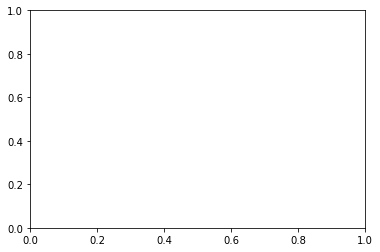

In [37]:
data.plot.scatter(x='Date', y='OilPrice' )

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


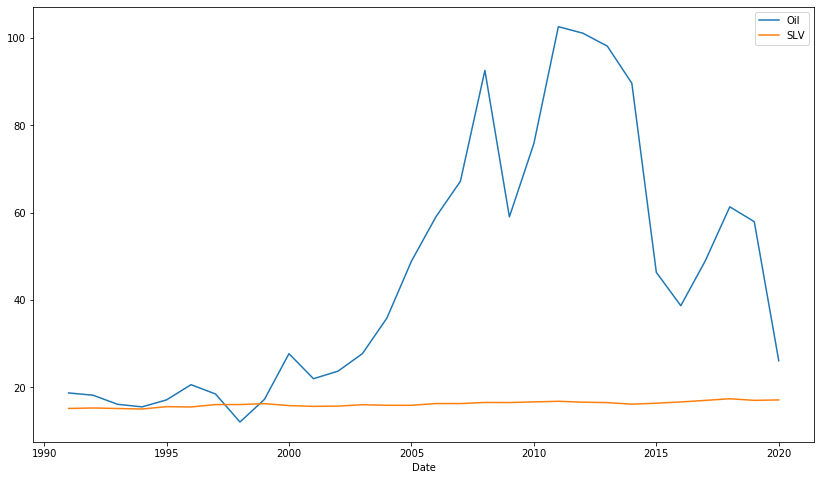

In [141]:
grouped = data.groupby(['Date']) ['Oil', 'SLV'].sum()
grouped.plot(figsize=(14,8))
plt.show()